In [2]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#merge all forecasts with OSS OAS
var = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/var.csv')
xgb = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/xgb.csv')
rf = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/rf.csv')
svr = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/svr.csv')
lasso = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/lasso.csv')
beir = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Python Scripts/Modelling/test.csv')

In [12]:
var = var.iloc[:,1]
xgb = xgb.iloc[:,1]
rf = rf.iloc[:,1]
svr = svr.iloc[:,1]
lasso = lasso.iloc[:,1]

In [13]:
beir['var'] = var
beir['xgb'] = xgb
beir['rf'] = rf
beir['svr'] = svr
beir['lasso'] = lasso
beir = beir.set_index('date')

In [14]:
beir

,BEIR,var,xgb,rf,svr,lasso
date,,,,,,
01/05/2022,2.880,2.643733,2.657388,2.902024,2.577737,2.932363
02/05/2022,2.810,2.640652,2.653764,2.906146,2.577737,2.937650
03/05/2022,2.830,2.641845,2.664643,2.889703,2.577737,2.909975
04/05/2022,2.860,2.642312,2.681165,2.889703,2.577737,2.901313
05/05/2022,2.870,2.642881,2.658712,2.906146,2.577737,2.904612
06/05/2022,2.860,2.643443,2.660505,2.902024,2.577737,2.891315
07/05/2022,2.860,2.644005,2.650797,2.899167,2.577737,2.899160
08/05/2022,2.860,2.644568,2.658712,2.922432,2.577737,2.895468
09/05/2022,2.750,2.645130,2.658712,2.930994,2.577737,2.886288


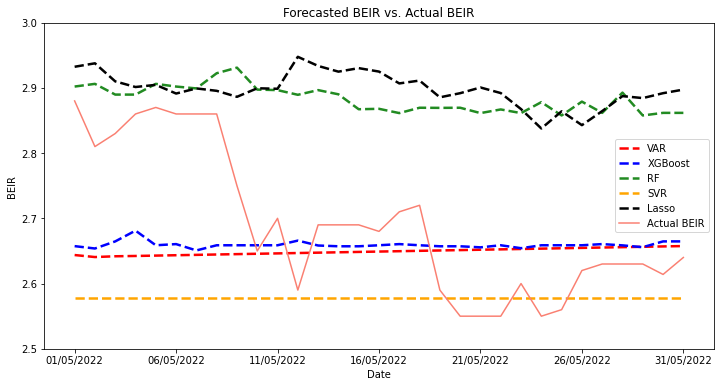

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
#yvalues = pd.DataFrame(y_test)
    
beir['var'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="red") # CPI fitted
beir['xgb'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="blue") # CPI fitted
beir['rf'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
beir['svr'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="orange") # CPI fitted
beir['lasso'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="black") # CPI fitted
beir['BEIR'].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["VAR",'XGBoost','RF','SVR','Lasso','Actual BEIR'])
plt.savefig('rf_forecast_14-08.png')